<a href="https://colab.research.google.com/github/EnriqueRangel/python_practicas/blob/main/Clusterizaci%C3%B3n_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
datos = pd.read_csv("housing.csv")

In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

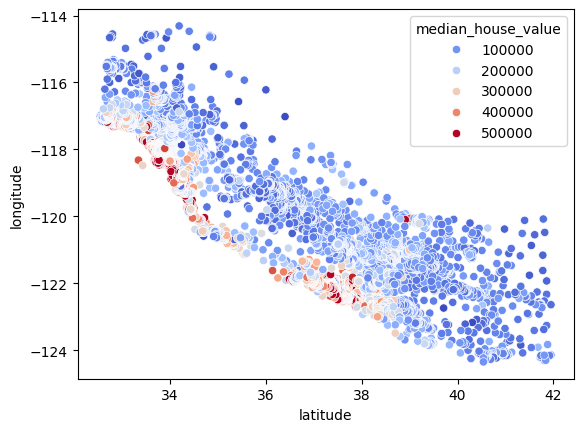

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")


TypeError: cannot convert the series to <class 'float'>

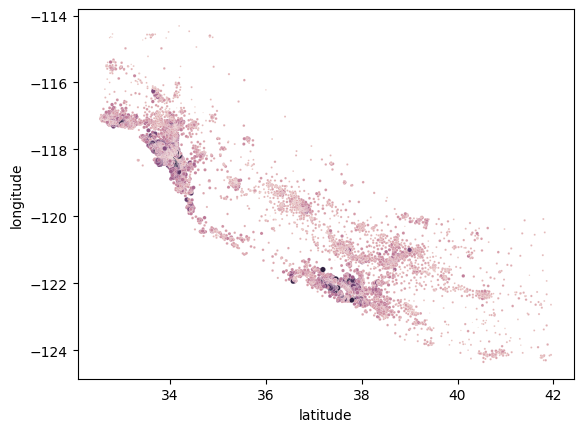

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income",
               s=datos["median_income"])

In [ ]:
datos.loc[:, ["latitude", "longitude", "median_income"]]


,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [ ]:
from sklearn.cluster import KMeans

X = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predicciones.shape

(20640,)

In [ ]:
X["segmento_economico"] = predicciones

In [ ]:
X

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,4
1,37.86,-122.22,8.3014,4
2,37.85,-122.24,7.2574,4
3,37.85,-122.25,5.6431,4
4,37.85,-122.25,3.8462,5
...,...,...,...,...
20635,39.48,-121.09,1.5603,5
20636,39.49,-121.21,2.5568,5
20637,39.43,-121.22,1.7000,5
20638,39.43,-121.32,1.8672,5


In [ ]:
X["segmento_economico"].value_counts()

2    7009
5    4876
1    3842
4    2771
0    1684
3     458
Name: segmento_economico, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

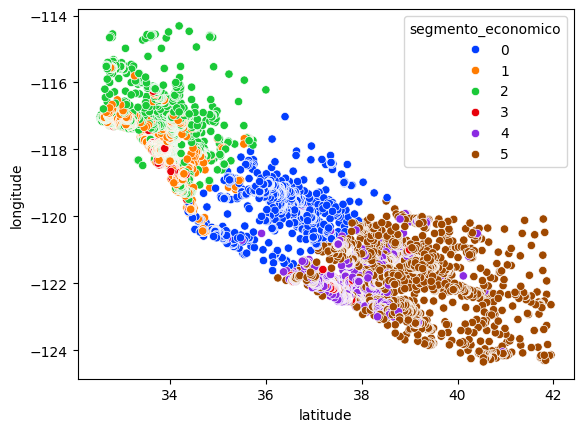

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=X, hue="segmento_economico",
               palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

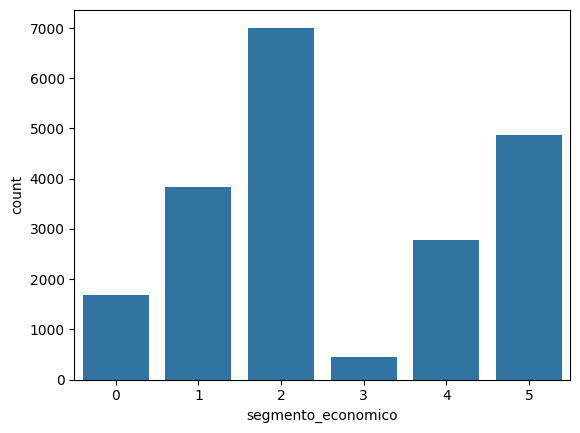

In [ ]:
sb.countplot(x="segmento_economico", data=X)

In [ ]:
X.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     2.668885
1     5.515851
2     2.872779
3    10.950196
4     5.518715
5     2.822290
Name: median_income, dtype: float64